In [1]:
import pandas as pd
import numpy as np  
import string       
import re
import sklearn
import matplotlib.pyplot as plt

In [2]:
df = pd.read_pickle(r'C:\Users\35793\Documents\2021-2022 CF\Project\ExxonPret\PretTweets.pickle')

In [3]:
df = df.drop(['_id','type','tweet_id','user_name'],axis = 1)

In [4]:
df.head(10)

,date,text,sentiment
0,2019-03-30 23:04:23,@Pret Duck Hoisin Wrap is £3.50 out £4.50 in?,0.0000
1,2019-03-30 21:48:41,@Pret More vegan baguettes plz😁,0.1440
2,2019-03-30 21:05:14,@JimmyMc_G @Pret @BBCWatchdog would love all t...,0.6369
3,2019-03-30 19:53:26,.\n\nFREE COFFEES in PRET A MANGER\n\n&gt;&gt;...,0.6166
4,2019-03-30 19:48:48,"No, the floor of a train isn’t a bin... 😡 @sta...",0.0000
5,2019-03-30 19:32:48,FREE Coffees in Pret A Manger —-&gt; #FREE #Pr...,0.6166
6,2019-03-30 19:07:05,@Pret The vegan cookie which needs to make a c...,0.0000
7,2019-03-30 18:45:48,Strange but lovely experience yesterday; happe...,0.8896
8,2019-03-30 18:31:30,"@Pret I have chatted to the team many times, s...",-0.5002
9,2019-03-30 18:27:31,@Pret Thanks at Waterloo Stn to staff for the ...,0.7901


In [5]:
df['date'].max()

Timestamp('2019-03-30 23:04:23')

In [6]:
df['date'].min()

Timestamp('2018-04-01 04:52:35')

In [7]:
mean = (np.array(df['date'], dtype='datetime64[s]')
        .view('i8')
        .mean()
        .astype('datetime64[s]'))

In [8]:
print(mean)

2018-09-21T02:43:43


In [9]:
df['date'].median()

Timestamp('2018-09-26 17:48:08.500000')

In [10]:
df['text'].duplicated().sum()

243

In [11]:
df.isna().sum()

date         0
text         0
sentiment    0
dtype: int64

In [12]:
df = df.drop_duplicates()

In [13]:
def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

In [14]:
def lower_case(input_string):
    new_string = input_string.lower()
    return new_string

In [15]:
def remove_URL_char(input_str):
    new_str = re.sub(r'http\S+', '', input_str)# to remove http:// links
    new_str = re.sub(r'https\S+', '', new_str)
    new = re.sub(r'@([A-Za-z0-9_]+)', '', new_str)
    new_st = re.sub(r'[^a-zA-Z0-9\s]', '', new)
    return new_st

In [16]:
df['text'] = df['text'].apply(lower_case)
df['text'] = df['text'].apply(remove_URL_char)
df['text'] = df['text'].apply(deEmojify)

df.head(10)

,date,text,sentiment
0,2019-03-30 23:04:23,duck hoisin wrap is 350 out 450 in,0.0000
1,2019-03-30 21:48:41,more vegan baguettes plz,0.1440
2,2019-03-30 21:05:14,would love all the information on this,0.6369
3,2019-03-30 19:53:26,\n\nfree coffees in pret a manger\n\ngtgtgt l...,0.6166
4,2019-03-30 19:48:48,no the floor of a train isnt a bin litter pr...,0.0000
5,2019-03-30 19:32:48,free coffees in pret a manger gt free pretaman...,0.6166
6,2019-03-30 19:07:05,the vegan cookie which needs to make a come back,0.0000
7,2019-03-30 18:45:48,strange but lovely experience yesterday happen...,0.8896
8,2019-03-30 18:31:30,i have chatted to the team many times so far ...,-0.5002
9,2019-03-30 18:27:31,thanks at waterloo stn to staff for the lovel...,0.7901


In [17]:
import nltk
from nltk.tokenize import word_tokenize
def change_tokens(input_str):
    tokens = nltk.word_tokenize(input_str)
    return tokens

In [18]:
df['text'] = df['text'].apply(change_tokens)

In [19]:
from nltk.corpus import stopwords

def remove_stop_words(input_str):
    tokens = [w for w in input_str if w not in stopwords.words('english')]
    return tokens

In [20]:
df['text'] = df['text'].apply(remove_stop_words)

df.head(10)

,date,text,sentiment
0,2019-03-30 23:04:23,"[duck, hoisin, wrap, 350, 450]",0.0000
1,2019-03-30 21:48:41,"[vegan, baguettes, plz]",0.1440
2,2019-03-30 21:05:14,"[would, love, information]",0.6369
3,2019-03-30 19:53:26,"[free, coffees, pret, manger, gtgtgt, ltltlt, ...",0.6166
4,2019-03-30 19:48:48,"[floor, train, isnt, bin, litter, pretamanger]",0.0000
5,2019-03-30 19:32:48,"[free, coffees, pret, manger, gt, free, pretam...",0.6166
6,2019-03-30 19:07:05,"[vegan, cookie, needs, make, come, back]",0.0000
7,2019-03-30 18:45:48,"[strange, lovely, experience, yesterday, happe...",0.8896
8,2019-03-30 18:31:30,"[chatted, team, many, times, far, completely, ...",-0.5002
9,2019-03-30 18:27:31,"[thanks, waterloo, stn, staff, lovely, soya, l...",0.7901


In [21]:
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()

def stem_str(input_str):
    stems = []
    for t in input_str:    
        stems.append(porter.stem(t))
    return(stems)

In [22]:
df['text'] = df['text'].apply(stem_str)

In [23]:
df.head()

,date,text,sentiment
0,2019-03-30 23:04:23,"[duck, hoisin, wrap, 350, 450]",0.0000
1,2019-03-30 21:48:41,"[vegan, baguett, plz]",0.1440
2,2019-03-30 21:05:14,"[would, love, inform]",0.6369
3,2019-03-30 19:53:26,"[free, coffe, pret, manger, gtgtgt, ltltlt, fr...",0.6166
4,2019-03-30 19:48:48,"[floor, train, isnt, bin, litter, pretamang]",0.0000


In [24]:
df1 = df.drop(['text'],axis =1)
df1

,date,sentiment
0,2019-03-30 23:04:23,0.0000
1,2019-03-30 21:48:41,0.1440
2,2019-03-30 21:05:14,0.6369
3,2019-03-30 19:53:26,0.6166
4,2019-03-30 19:48:48,0.0000
...,...,...
42661,2018-04-01 07:11:47,0.8874
42662,2018-04-01 07:06:02,0.0000
42663,2018-04-01 05:45:02,0.5719
42664,2018-04-01 05:03:38,0.6369


In [27]:
df1 = df1.groupby(df1.index.date).mean()
df1

,sentiment
2018-04-01,0.330537
2018-04-02,0.339570
2018-04-03,0.303399
2018-04-04,0.285364
2018-04-05,0.286019
...,...
2019-03-26,0.227358
2019-03-27,0.264510
2019-03-28,0.266769
2019-03-29,0.300712


In [28]:
from matplotlib.pyplot import figure


Text(0, 0.5, 'Sentiment score')

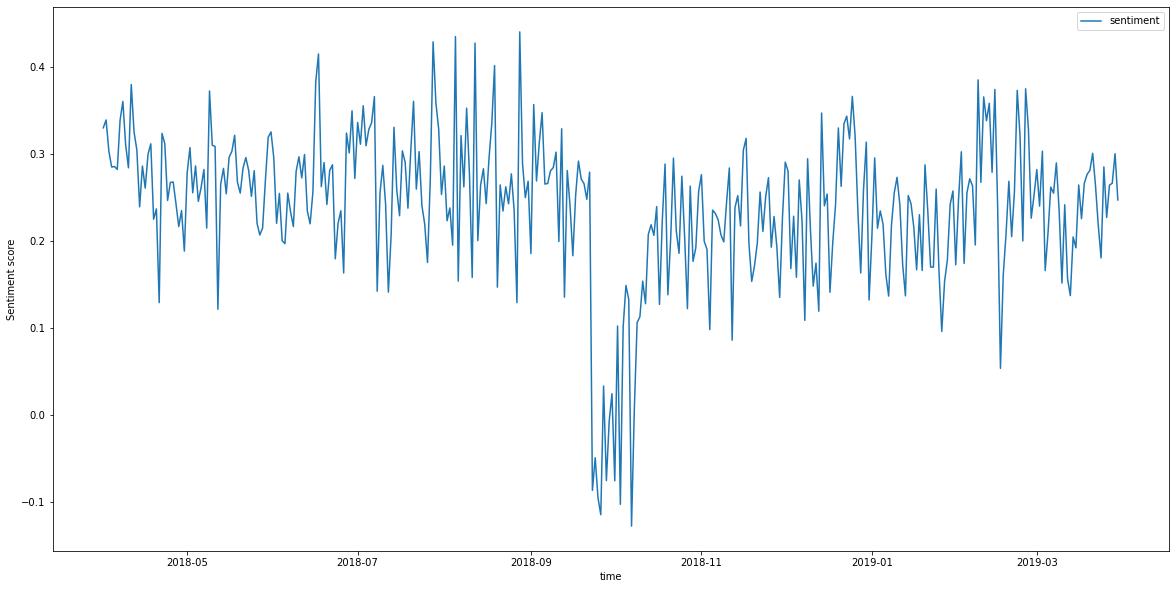

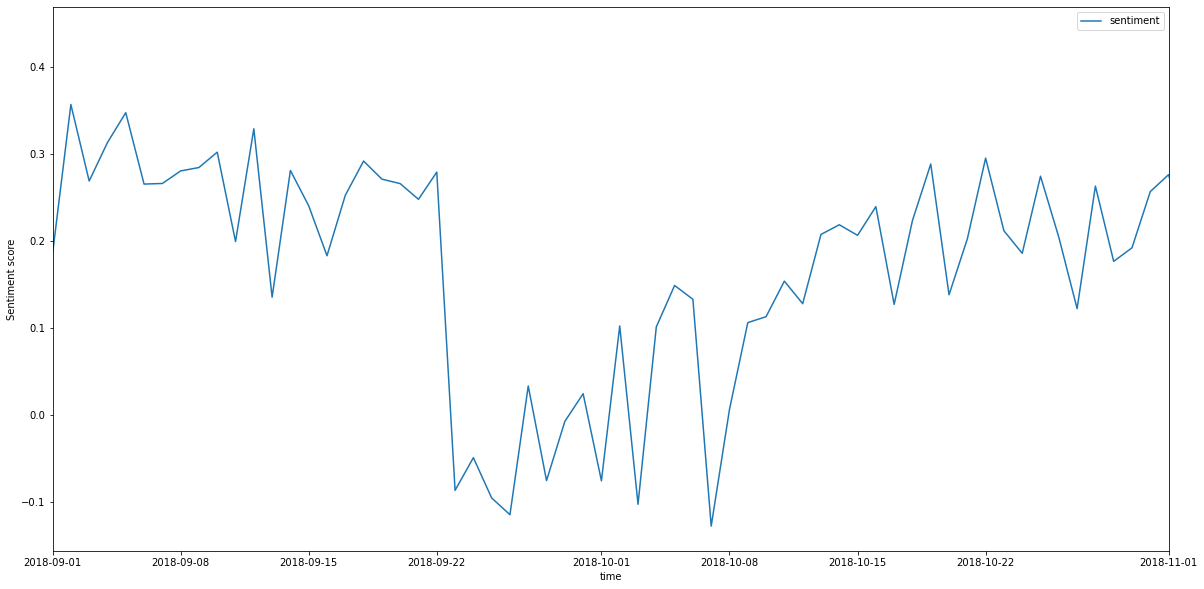

In [29]:
df1.plot(figsize=(20,10))
plt.xlabel("time")
plt.ylabel("Sentiment score")

df1.plot(figsize=(20,10),xlim = ['2018-09-01','2018-11-01'])
plt.xlabel("time")
plt.ylabel("Sentiment score")
#figure(figsize=(8, 6), dpi=80)

Text(0, 0.5, 'Sentiment score')

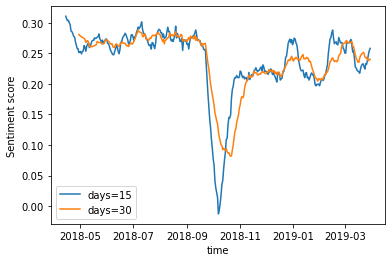

In [30]:
df_senti = df1['sentiment']
df_senti.rolling(15).mean().plot(label='days=15')
df_senti.rolling(30).mean().plot(label='days=30')
plt.legend()
plt.xlabel("time")
plt.ylabel("Sentiment score")

In [31]:
event_time = '2018-09-22 00:00:00'

df_before= df.loc[df['date'] < event_time]
df_after = df.loc[df['date'] >= event_time]

df_before.head(10)

,date,text,sentiment
22190,2018-09-21 21:57:54,"[tgifand, much, love, daili, nhmadisonsq, happ...",0.7998
22191,2018-09-21 21:31:42,"[thank, x]",0.3612
22192,2018-09-21 21:30:40,"[dinner, late, shift, chicken, pesto, flatbrea...",0.0000
22193,2018-09-21 21:25:40,"[hmmmif, pret, devonampblak, close, might, upr...",0.0000
22194,2018-09-21 20:28:27,"[bit, gross, 3inchlong, stick, citi, harvest, ...",-0.7495
22195,2018-09-21 20:17:05,"[oh, im, liter, happi, fuckin, love, gud, mug]",0.9184
22196,2018-09-21 20:13:04,"[ye, amaz, vegan, option]",0.7777
22197,2018-09-21 20:12:00,"[bring, back, mushroom, risotto, soup]",0.0000
22198,2018-09-21 19:38:31,"[guess, tast, fall, pretamang, 23, full, cant,...",0.0000
22199,2018-09-21 19:35:50,"[see, shirt]",0.0000


In [32]:
len(df_before)

20476

In [33]:
df_after.sample(20)

,date,text,sentiment
10874,2018-12-09 09:57:54,"[extrem, angri, treat, staff, tunbridg, well, ...",-0.6901
9464,2018-12-24 11:25:25,"[wow, gave, gift, card, cant, even, use, local...",0.8042
3763,2019-02-15 11:32:57,"[hi, pleas, could, account, activ, link, resen...",0.5848
3237,2019-02-21 12:54:18,"[anni, get, sketch, book, creat, packag, pret,...",0.6705
14063,2018-11-10 11:21:28,"[got, first, day, back, work, look]",0.0000
21751,2018-09-25 11:23:41,"[awwww, thank, im, go, share, son, get, back, ...",0.7840
637,2019-03-25 11:03:24,"[dear, decaf, sticker, big, environment, wast,...",0.3382
15801,2018-10-30 14:18:39,"[bought, yogurthoney, pot, farringdon, rd, sto...",-0.3595
11020,2018-12-07 13:54:38,"[guy, dark, chocol, almond]",0.0000
6573,2019-01-23 16:53:29,"[short, expos, silentmovi, documentari, ordeal...",0.0000


In [34]:
l = []

for i, row in enumerate(df_before['text'].values):
    l = l+row
l

['tgifand',
 'much',
 'love',
 'daili',
 'nhmadisonsq',
 'happi',
 'hour',
 'rare',
 'take',
 'advantag',
 'friday',
 'still',
 'life',
 'glass',
 'rose',
 'giant',
 'pile',
 'napkin',
 'see',
 'amp',
 'itsnotmeitsyoulondon',
 'purs',
 'thank',
 'x',
 'dinner',
 'late',
 'shift',
 'chicken',
 'pesto',
 'flatbread',
 'amp',
 'ham',
 'chees',
 'tomato',
 'croissant',
 'winningcombo',
 'feedmemor',
 'hmmmif',
 'pret',
 'devonampblak',
 'close',
 'might',
 'upris',
 'smh',
 'bit',
 'gross',
 '3inchlong',
 'stick',
 'citi',
 'harvest',
 'salad',
 'mean',
 'throw',
 'rest',
 'away',
 'alreadi',
 'late',
 'ive',
 'eaten',
 'half',
 'unfortun',
 'yuck',
 'oh',
 'im',
 'liter',
 'happi',
 'fuckin',
 'love',
 'gud',
 'mug',
 'ye',
 'amaz',
 'vegan',
 'option',
 'bring',
 'back',
 'mushroom',
 'risotto',
 'soup',
 'guess',
 'tast',
 'fall',
 'pretamang',
 '23',
 'full',
 'cant',
 'step',
 'away',
 'desk',
 'go',
 'return',
 'right',
 'amp',
 'store',
 'isnt',
 'pick',
 'show',
 'right',
 'go',
 '

In [35]:
def remove_background_tokens(input_str):
    tokens = [w for w in input_str if w not in l]
    return tokens

In [36]:
len(df_after)

22190

In [37]:
df_after['text'] = df_after['text'].apply(remove_background_tokens)

C:\Users\35793\AppData\Local\Temp/ipykernel_41928/2290634429.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_after['text'] = df_after['text'].apply(remove_background_tokens)


In [38]:
df_after.sample(20)

,date,text,sentiment
15673,2018-10-31 19:43:17,[],0.0000
1904,2019-03-08 22:32:43,[],0.6124
10408,2018-12-14 09:07:03,[],0.5106
8260,2019-01-10 09:40:04,[bloomingsoire],0.9359
6380,2019-01-25 10:52:20,[],0.5972
17488,2018-10-11 16:50:17,[],0.5267
18057,2018-10-08 17:57:57,[daughter2],-0.6808
16340,2018-10-23 19:43:25,[],0.0572
18193,2018-10-08 10:31:35,"[transplant, hostil]",-0.8828
355,2019-03-26 22:12:09,"[himmler, aryan, nazi]",-0.7723


In [39]:
df3 = df_after[df_after['text'].map(lambda d: len(d)) > 0]

In [40]:
df3.head(10)

,date,text,sentiment
3,2019-03-30 19:53:26,[ltltlt],0.6166
7,2019-03-30 18:45:48,[haze],0.8896
8,2019-03-30 18:31:30,[clueless],-0.5002
10,2019-03-30 18:00:43,[leedsbyexampl],0.1352
17,2019-03-30 15:31:37,[sunsilk],0.0000
18,2019-03-30 15:26:16,[offtop],0.7876
22,2019-03-30 13:38:32,"[frittata, frittata, districtofcolumbia]",0.0000
25,2019-03-30 12:10:52,[herbivorlici],0.6881
28,2019-03-30 10:59:44,[whitefilt],0.0000
29,2019-03-30 10:35:55,"[anj, anj, anjindia, jaipur, rajasthanicultur,...",0.0000


In [41]:
len(df3)

8975

In [65]:
x_train,x_test,y_train,y_test= sklearn.model_selection.train_test_split(df3['text'],df3['sentiment'],test_size=0.4)

In [66]:
x_train.head()

17064                                              [spoof]
14511                                               [idol]
13800    [volumin, anj, anjindia, thecourtyardofcolor, ...
7164                                                [sand]
2638                                              [cupmov]
Name: text, dtype: object

In [43]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

In [44]:
def dummy_fun(doc):
    return doc

vectorizer = TfidfVectorizer(
    analyzer='word',
    tokenizer=dummy_fun,
    preprocessor=dummy_fun,
    token_pattern=None,
    lowercase = False)
train_vectors = vectorizer.fit_transform(df3['text'])
#test_vectors = vectorizer.transform(x_test)
print(train_vectors.shape)

(8975, 10959)


In [51]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(
        tokenizer=dummy_fun,
        preprocessor=dummy_fun,
    )  

In [57]:
word_count=cv.fit_transform(x_train)
print(word_count)

  (0, 36105)	1
  (0, 68869)	1
  (0, 43410)	1
  (0, 1344)	1
  (0, 28016)	1
  (0, 4996)	1
  (0, 30384)	1
  (0, 3386)	1
  (0, 9556)	1
  (0, 66701)	1
  (0, 2349)	1
  (0, 31098)	1
  (0, 70820)	1
  (0, 37080)	1
  (0, 19123)	1
  (0, 68129)	1
  (0, 36057)	1
  (0, 23035)	1
  (0, 65503)	1
  (0, 45953)	1
  (1, 36105)	1
  (1, 36024)	1
  (1, 1169)	1
  (1, 70706)	1
  (1, 2741)	1
  :	:
  (41791, 43480)	2
  (41791, 21218)	2
  (41791, 3416)	1
  (41791, 22216)	1
  (41791, 70167)	1
  (41791, 69803)	1
  (41791, 38538)	1
  (41791, 21422)	1
  (41791, 28544)	1
  (41791, 24053)	1
  (41792, 36105)	1
  (41792, 68110)	1
  (41792, 297)	1
  (41792, 28139)	1
  (41792, 31036)	1
  (41792, 35382)	1
  (41792, 20646)	1
  (41792, 32977)	1
  (41792, 15598)	1
  (41792, 35941)	1
  (41792, 42437)	1
  (41792, 13808)	1
  (41792, 14279)	1
  (41792, 23628)	1
  (41792, 25907)	1


In [58]:
word_count.shape

(41793, 72905)

In [61]:
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(word_count)
df_idf = pd.DataFrame(tfidf_transformer.idf_, index=cv.get_feature_names_out(),columns=["idf_weights"])

In [62]:
df_idf.sort_values(by=['idf_weights'])

,idf_weights
pret,1.129867
’,2.677860
prêt,3.329110
:,3.365386
thank,3.536107
...,...
mthwgeek,10.947361
mtn,10.947361
mtng,10.947361
msged,10.947361


In [64]:
#tfidf
tf_idf_vector=tfidf_transformer.transform(word_count)
feature_names = cv.get_feature_names_out()

In [65]:
#first_document_vector=tf_idf_vector[1]
#df_tfifd= pd.DataFrame(first_document_vector.T.todense(), index=feature_names, columns=["tfidf"])

In [66]:
#df_tfifd.sort_values(by=["tfidf"],ascending=False)

,tfidf
risotto,0.312500
pregnant,0.291811
mushroom,0.280106
everyday,0.255364
practic,0.250408
...,...
juniortop,0.000000
junipah,0.000000
junjungannya,0.000000
junk,0.000000


In [45]:
from sklearn.cluster import KMeans

# initialize kmeans with 3 centroids
kmeans = KMeans(n_clusters=2, random_state=42)
# fit the model
kmeans.fit(train_vectors)
# store cluster labels in a variable
clusters = kmeans.labels_


In [46]:
clusters[:30]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [47]:
from sklearn.decomposition import PCA

# initialize PCA with 2 components
pca = PCA(n_components=2, random_state=42)
# pass our X to the pca and store the reduced vectors into pca_vecs
pca_vecs = pca.fit_transform(train_vectors.toarray())
# save our two dimensions into x0 and x1
x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]

In [48]:
#Top terms per cluster
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(2):
    print("Cluster %d:" % i, end='')
    print()
    for ind in order_centroids[i, :20]:
        print(' %s' % terms[ind], end='')
        print()


Cluster 0:
 inquest
 ednanlaperous
 foodallergi
 leedsbyexampl
 neglig
 loophol
 fatal
 allergyhour
 pretinquest
 ltltlt
 anaphylact
 manslaught
 natashaslaw
 shadowban
 workplacebulli
 natashaednanlaperous
 coyo
 lawsuit
 jh
 glyphos
Cluster 1:
 anj
 anjindia
 rajasthanicultur
 jaipur
 indiancontemporari
 citiypalac
 endofseasonsal
 thecourtyardofcolor
 websitewwwanjkreationscom
 anarkali
 blush
 asymmetr
 therosestori
 dainti
 lehenga
 epitom
 sage
 palazzo
 lotu
 bustier


C:\Users\35793\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [37]:
x_train = [x for x in x_train if str(x) != 'nan']
x_train.info()

[['orang', 'hot', 'chocol', 'festiv', 'hot', 'year', "n't"],
 ['upon'],
 ['’',
  'autumn',
  'menu',
  '-',
  'chang',
  'season',
  'delici',
  'autumn',
  'today',
  'tco0qyjroznxg'],
 ['net', '100', '%', 'courtier', 'tcofu3gdodoqp', 'tcoij44zwot52'],
 ['minc',
  'avail',
  'berlin',
  'main',
  'station',
  'usual',
  'stop',
  'sure',
  'stop'],
 [],
 ['get',
  'food',
  'middl',
  '13',
  'hour',
  'rehears',
  'show',
  'day',
  'got',
  'counter',
  'left',
  'purs',
  'rehears',
  'room',
  'said',
  '’',
  'put',
  'back',
  'given',
  'free',
  'good',
  'world'],
 ['hey', 'branch', 'tri', 'speed', 'global', 'warm'],
 [],
 ['follow', '10001', 'agre'],
 ['niabean93',
  'whole',
  'everyon',
  'soon',
  'one',
  'cater',
  'anyon',
  'even',
  'hint',
  'allergi'],
 ['breakfast',
  'breakfast',
  'coffe',
  'yoghurt',
  'orang',
  'food',
  'travel',
  'fruit'],
 ["'re", 'plot', 'coup', 'de'],
 ['5', 'ne', 'tcopo0mdcukqh'],
 ['realli',
  'appreci',
  'nutrit',
  'alway',
  'giv

In [49]:
train_data = pd.DataFrame(df3['text'])
train_data['cluster'] = clusters
train_data['x0'] = x0
train_data['x1'] = x1

In [50]:
train_data

,text,cluster,x0,x1
3,[ltltlt],0,-0.025242,-0.016968
7,[haze],0,-0.021226,-0.012098
8,[clueless],0,-0.021753,-0.012723
10,[leedsbyexampl],0,-0.032302,-0.039742
17,[sunsilk],0,-0.020992,-0.011826
...,...,...,...,...
22172,[auuuuch],0,-0.020992,-0.011826
22181,[pimlicopret],0,-0.020992,-0.011826
22183,"[stodgi, croisssnt]",0,-0.020992,-0.011826
22188,[hottotrot],0,-0.020992,-0.011826


In [51]:
# map clusters to appropriate labels 
cluster_map = {0: "social", 1: "non-social"}
# apply mapping
train_data['cluster'] = train_data['cluster'].map(cluster_map)

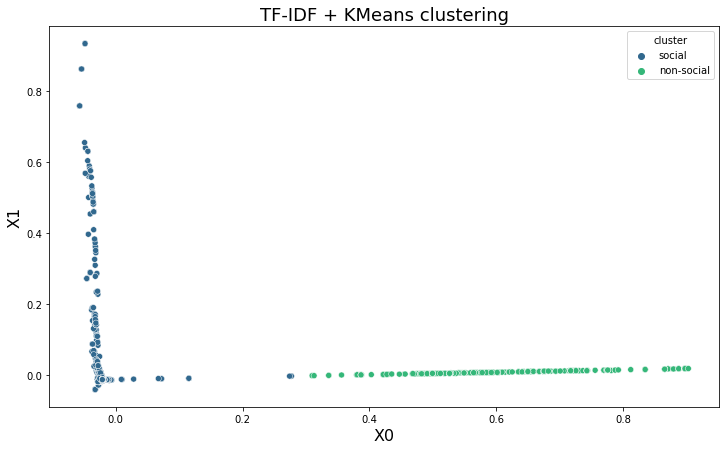

In [52]:
import seaborn as sns

# set image size
plt.figure(figsize=(12, 7))
# set a title
plt.title("TF-IDF + KMeans clustering", fontdict={"fontsize": 18})
# set axes names
plt.xlabel("X0", fontdict={"fontsize": 16})
plt.ylabel("X1", fontdict={"fontsize": 16})
# create scatter plot with seaborn, where hue is the class used to group the data
sns.scatterplot(data=train_data, x='x0', y='x1', hue='cluster', palette="viridis")
plt.show()

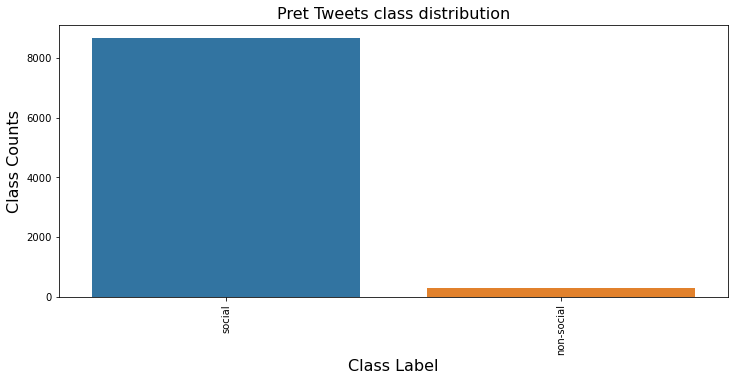

In [53]:
plt.figure(figsize=(12,5))
sns.countplot(x=train_data.cluster)
plt.title('Pret Tweets class distribution', fontsize=16)
plt.ylabel('Class Counts', fontsize=16)
plt.xlabel('Class Label', fontsize=16)
plt.xticks(rotation='vertical');

In [54]:
train_data['cluster'].value_counts()

social        8676
non-social     299
Name: cluster, dtype: int64

In [55]:
non_social = train_data[train_data['cluster'] == 'non-social']

social  = train_data[train_data['cluster'] == 'social']

 
social_resampled = social.sample(n=len(non_social))

In [56]:
rebalance = pd.concat([social_resampled, non_social])
rebalance

,text,cluster,x0,x1
5970,"[ws, blongingsbla, nt]",social,-0.021272,-0.012151
3986,"[stvalentinesday, overdon]",social,-0.021528,-0.012455
14090,[manzor],social,-0.020992,-0.011826
2158,"[kinship, kinship, kinship]",social,-0.020992,-0.011826
22,"[frittata, frittata, districtofcolumbia]",social,-0.021138,-0.011995
...,...,...,...,...
19888,"[anj, anjindia, indiancontemporari]",non-social,0.675353,0.012007
19968,"[anj, anjindia, indiancontemporari]",non-social,0.675353,0.012007
20042,"[anj, anjindia, indiancontemporari]",non-social,0.675353,0.012007
20167,"[anj, anj, anjindia, indiancontemporari]",non-social,0.682037,0.012045


In [57]:
x_train,x_test,y_train,y_test= sklearn.model_selection.train_test_split(rebalance['text'],rebalance['cluster'],test_size=0.2)

In [55]:
train_vectors2 = vectorizer.fit_transform(rebalance['text'])


In [56]:
pca_vecs2 = pca.fit_transform(train_vectors2.toarray())

In [ ]:
x_train,x_test,y_train,y_test= sklearn.model_selection.train_test_split(train_data['text'],train_data['cluster'],test_size=0.4)

In [89]:
x_train,x_test,y_train,y_test= sklearn.model_selection.train_test_split(train_data['text'],train_data['cluster'],test_size=0.4)

In [99]:
trainFeatureSet,testFeatureSet,y_train,y_test= sklearn.model_selection.train_test_split(pca_vecs2,rebalance['cluster'],test_size=0.4)

In [60]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(
        tokenizer=dummy_fun,
        preprocessor=dummy_fun,
    )  

word_count=cv.fit_transform(x_train)

trainFeatureSet = cv.transform(x_train)
testFeatureSet = cv.transform(x_test)

In [61]:
testFeatureSet.shape

(120, 599)

In [62]:
trainFeatureSet

<478x599 sparse matrix of type '<class 'numpy.int64'>'
	with 2107 stored elements in Compressed Sparse Row format>

In [63]:
from sklearn.linear_model import LogisticRegression

In [64]:
logRegModel = LogisticRegression()
logRegModel.fit(trainFeatureSet,y_train)

LogisticRegression()

In [65]:
predLogReg1 = logRegModel.predict(testFeatureSet)
score = logRegModel.score(testFeatureSet,y_test)
print("Approximate Accuracy with countVectorizer : ", score*100)

Approximate Accuracy with countVectorizer :  100.0


In [66]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(trainFeatureSet,y_train)

predictions = mnb.predict(testFeatureSet)

score = mnb.score(testFeatureSet,y_test)
print("Bag of words accuracy ",score*100)

Bag of words accuracy  100.0


In [74]:
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve


In [68]:
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(trainFeatureSet,y_train)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(testFeatureSet)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, y_test)*100)

SVM Accuracy Score ->  100.0


In [69]:
print(classification_report(y_test,predictions_SVM))

              precision    recall  f1-score   support

  non-social       1.00      1.00      1.00        68
      social       1.00      1.00      1.00        52

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [70]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

  non-social       1.00      1.00      1.00        68
      social       1.00      1.00      1.00        52

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [71]:
print(classification_report(y_test,predLogReg1))

              precision    recall  f1-score   support

  non-social       1.00      1.00      1.00        68
      social       1.00      1.00      1.00        52

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



C:\Users\35793\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


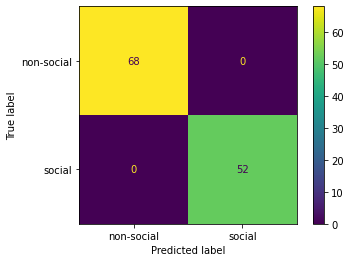

In [75]:
plot_confusion_matrix(logRegModel, testFeatureSet, y_test)

C:\Users\35793\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


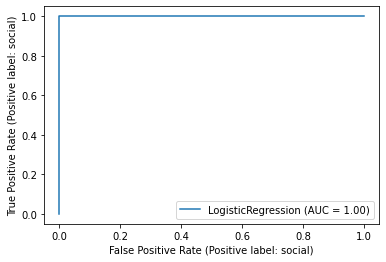

In [76]:
plot_roc_curve(logRegModel, testFeatureSet, y_test)